In [31]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob


In [32]:
df = pd.read_csv('amazon_product_reviews.csv')
df.shape
df.head()

C:\Users\Lenovo Thinkpad T570\AppData\Local\Temp\ipykernel_11536\2818262655.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('amazon_product_reviews.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [33]:
# Drop na and unwanted columns
selected_columns = ['name', 'reviews.text', 'reviews.rating']
df = df[selected_columns]
df = df.dropna(subset=['reviews.text'])

# Tokenize
tokenized_reviews = df['reviews.text'].apply(word_tokenize)
all_tokens = [token for review in tokenized_reviews for token in review]


In [34]:
# Count most common words
word_counts = Counter(all_tokens)
most_common_words = word_counts.most_common(200)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
most_common_df.head()

# Define custom stop words
stop_words = spacy.lang.en.STOP_WORDS
polarity_negation ={
    # Negation words
    "not", "no", "never", "none", "neither", "nor", "nothing", "nobody", "nowhere", "no one",
    # Polarity words
    "good", "bad", "great", "terrible", "awful", "excellent", "fantastic", "amazing", "horrible",
    "positive", "negative", "happy", "sad", "love", "hate", "better"}

# Remove negation/polarity words and check overlap with most common words
stop_words_custom = stop_words - polarity_negation
most_common_set = set(most_common_df['Word'])
common_and_not_stop = most_common_set - polarity_negation
print(common_and_not_stop)

{'watch', 'price', 'just', 'was', 'old', 'at', 'first', 'Good', 'of', 'can', 'out', 'which', 'the', 'up', 'light', 'am', 'app', 'Bought', 'is', 'My', 'from', 'you', 'product', 'have', 'cable', 'do', 'had', 'got', 'get', 'money', 'set', 'still', 'she', 'your', ',', 'perfect', 'screen', 'they', 'a', 'using', 'battery', '2', 'these', 'new', "n't", 'really', 'my', 'we', 'fire', 'there', 'books', 'life', 'purchase', 'in', 'loves', 'tablet', 'this', 'as', 'work', 'Great', 'Christmas', 'many', 'need', 'he', 'far', 'year', 'who', 'music', 'bought', 'could', 'play', 'well', 'The', 'This', 'kids', 'Very', 'If', 'only', 'it', 'used', 'our', 'much', 'i', 'does', 'gift', 'been', 'home', 'and', 'because', 'daughter', 'son', ')', 'fast', 'Love', 'quality', 'by', 'speaker', 'Easy', 'but', 'has', 'recommend', "''", 'everything', 'movies', 'things', 'I', 'able', 'go', 'that', 'Works', 'her', 'one', 'about', '.', 'all', 'what', 'if', 'some', 'more', 'works', 'like', 'even', '...', 'tablets', 'on', "'ve",

In [35]:
def preprocess_batch(texts):
    # Process texts in batch
    docs = list(nlp.pipe(texts))
    # Extract tokens without stop words for each document
    processed_texts = [" ".join([token.text for token in doc if token.text.lower() not in stop_words_custom]) for doc in docs]
    return processed_texts

In [36]:
reviews = df['reviews.text'].tolist()
processed_reviews = preprocess_batch(reviews)
df['reviews.clean'] = processed_reviews
df.head()

,name,reviews.text,reviews.rating,reviews.clean
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,product far not disappointed . children love u...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,great beginner experienced person . Bought gif...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,"Inexpensive tablet use learn , step NABI . thr..."
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Fire HD 8 weeks love . tablet great value . Pr...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,"bought grand daughter comes visit . set user ,..."


In [37]:
def sentiment_analysis(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    # Determine sentiment label based on the polarity score
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [38]:
df['sentiment'] = df['reviews.clean'].apply(sentiment_analysis)
df.head()
df.to_csv('sentiment_analysis.csv', index=False)

In [39]:
df = pd.read_csv('sentiment_analysis.csv')

reviews.rating
5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: count, dtype: int64

In [55]:
def convert_rating_to_sent(rating):
    if rating > 3:
        return 'positive'
    if rating == 3:
        return 'neutral'
    if rating < 3:
        return 'negative'
df['rating.sentiment'] = df['reviews.rating'].map(convert_rating_to_sent)
df = df.dropna(subset=['sentiment', 'rating.sentiment'])
df.head()

,name,reviews.text,reviews.rating,reviews.clean,sentiment,rating.sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,product far not disappointed . children love u...,positive,positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,great beginner experienced person . Bought gif...,positive,positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,"Inexpensive tablet use learn , step NABI . thr...",positive,positive
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Fire HD 8 weeks love . tablet great value . Pr...,positive,positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,"bought grand daughter comes visit . set user ,...",positive,positive


In [63]:
df['sentiment'].value_counts()

sentiment
positive    30009
neutral      2701
negative     1506
Name: count, dtype: int64

In [64]:
df['rating.sentiment'].value_counts()

rating.sentiment
positive    32315
neutral      1499
negative      402
Name: count, dtype: int64

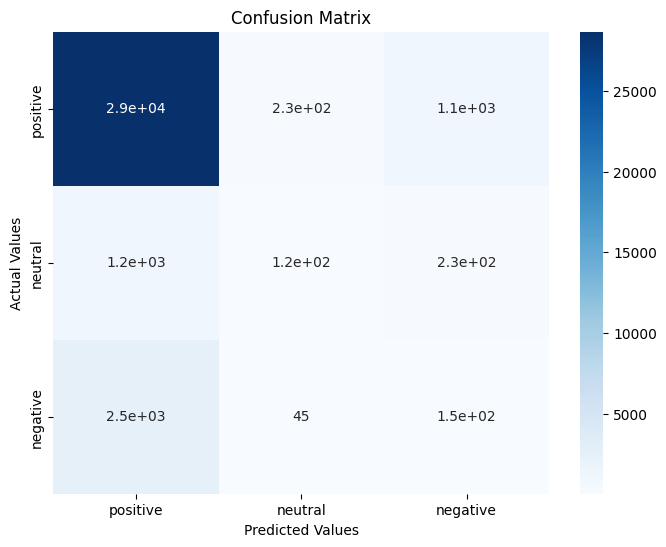

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(df['sentiment'], df['rating.sentiment'], labels=['positive', 'negative', 'neutral'])

# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['positive', 'neutral', 'negative'],
                               columns=['positive', 'neutral', 'negative'])

# Plot the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [76]:
# Get mismatched rows
mismatched_rows = df.loc[df['sentiment'] != df['rating.sentiment']]

# Print 10 random mismatched rows
mismatched_rows.count()

name                4318
reviews.text        5286
reviews.rating      5286
reviews.clean       5284
sentiment           5286
rating.sentiment    5286
dtype: int64

In [77]:
df.count()

name                27541
reviews.text        34216
reviews.rating      34216
reviews.clean       34214
sentiment           34216
rating.sentiment    34216
dtype: int64